In [54]:
%run common_setting.ipynb


import numpy as np
import pandas as pd
import statistics
import math
import re
from scipy import stats


In [55]:
#元素ごとのパラメーターシートの読み込み(xenonpyをインストールしている場合のみ有効)
from xenonpy.datatools import preset
preset
elems = preset.dataset_elements  # raw data
elems_completed = preset.dataset_elements_completed  # completed data

<Preset> includes:
"dataset_atom_init": C:\Users\NDO00\.xenonpy\dataset\atom_init.pd.xz
"dataset_elements": C:\Users\NDO00\.xenonpy\dataset\elements.pd.xz
"dataset_elements_completed": C:\Users\NDO00\.xenonpy\dataset\elements_completed.pd.xz
"mp_samples": C:\Users\NDO00\.xenonpy\userdata\mp_samples.pd.xz

# 元素ごとのパラメーターを取得

### 組成の情報を取得する練習

In [5]:
elems

,atomic_number,atomic_radius,atomic_radius_rahm,atomic_volume,atomic_weight,boiling_point,brinell_hardness,bulk_modulus,c6,c6_gb,...,vdw_radius_bondi,vdw_radius_dreiding,vdw_radius_mm3,vdw_radius_rt,vdw_radius_truhlar,vdw_radius_uff,sound_velocity,vickers_hardness,Polarizability,youngs_modulus
H,1,79.0,154.0,14.1,1.008000,20.280,NaN,NaN,6.499027,6.51,...,120.0,319.5,162.0,110.0,NaN,288.6,1270.0,NaN,0.666793,NaN
He,2,NaN,134.0,31.8,4.002602,4.216,NaN,NaN,1.420000,1.47,...,140.0,NaN,153.0,NaN,NaN,236.2,970.0,NaN,0.205052,NaN
Li,3,155.0,220.0,13.1,6.940000,1118.150,NaN,11.0,1392.000000,1410.00,...,181.0,NaN,255.0,NaN,NaN,245.1,6000.0,NaN,24.330000,4.9
Be,4,112.0,219.0,5.0,9.012183,3243.000,600.0,130.0,227.000000,214.00,...,NaN,NaN,223.0,NaN,153.0,274.5,13000.0,1670.0,5.600000,287.0
B,5,98.0,205.0,4.6,10.810000,3931.000,NaN,320.0,99.500000,99.20,...,NaN,402.0,215.0,NaN,192.0,408.3,16200.0,49000.0,3.030000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fl,114,NaN,NaN,NaN,289.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mc,115,NaN,NaN,NaN,288.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lv,116,NaN,NaN,NaN,293.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ts,117,NaN,NaN,NaN,294.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#xenonpyをインストールしていない場合は、このセルを実行して元素の各種パラメータを読み込む。
elems=pd.read_csv("elems.csv",index_col=0)
elems.head()

,atomic_number,atomic_radius,atomic_radius_rahm,atomic_volume,atomic_weight,boiling_point,brinell_hardness,bulk_modulus,c6,c6_gb,...,vdw_radius_bondi,vdw_radius_dreiding,vdw_radius_mm3,vdw_radius_rt,vdw_radius_truhlar,vdw_radius_uff,sound_velocity,vickers_hardness,Polarizability,youngs_modulus
H,1,79.0,154.0,14.1,1.008000,20.280,NaN,NaN,6.499027,6.51,...,120.0,319.5,162.0,110.0,NaN,288.6,1270.0,NaN,0.666793,NaN
He,2,NaN,134.0,31.8,4.002602,4.216,NaN,NaN,1.420000,1.47,...,140.0,NaN,153.0,NaN,NaN,236.2,970.0,NaN,0.205052,NaN
Li,3,155.0,220.0,13.1,6.940000,1118.150,NaN,11.0,1392.000000,1410.00,...,181.0,NaN,255.0,NaN,NaN,245.1,6000.0,NaN,24.330000,4.9
Be,4,112.0,219.0,5.0,9.012183,3243.000,600.0,130.0,227.000000,214.00,...,NaN,NaN,223.0,NaN,153.0,274.5,13000.0,1670.0,5.600000,287.0
B,5,98.0,205.0,4.6,10.810000,3931.000,NaN,320.0,99.500000,99.20,...,NaN,402.0,215.0,NaN,192.0,408.3,16200.0,49000.0,3.030000,NaN


In [50]:

#組成式
s = "Co0.086 Cu0.086 Fe0.086 Nb1 Ni0.086"

# より正確な書き方 → re.compile(r"\d+").findall(s)
element_test = re.findall("[a-zA-Z]+",s)

#元素の取得
print(element_test)

comp=re.findall("\d+(?:\.\d+)?",s)

#組成比の取得
print(comp)

#組成を数値(float)型に直す
comp_flo = map(float, comp)
comp_flo=list(comp_flo)
print(comp_flo)


#組成を合計すると１になるように規格化
a=sum(comp_flo)
print(a)
norm_comp_flo = [f/a for f in comp_flo]
print(norm_comp_flo)


['Co', 'Cu', 'Fe', 'Nb', 'Ni']
['0.086', '0.086', '0.086', '1', '0.086']
[0.086, 0.086, 0.086, 1.0, 0.086]
1.344
[0.06398809523809523, 0.06398809523809523, 0.06398809523809523, 0.744047619047619, 0.06398809523809523]


## 構成元素、組成を取得する関数

In [51]:
#構成元素をリスト化する関数
def elementlist(s):
    ele = re.findall("[a-zA-Z]+",s)
    return ele

#上の元素に対応する組成比のリスト
def compositionlist(s):
    
    comp=re.findall("\d+(?:\.\d+)?",s)
    

    comp_flo = map(float, comp)
    comp_flo=list(comp_flo)
    
    a=sum(comp_flo)    
    norm_comp_flo = [f/a for f in comp_flo]
    return norm_comp_flo

print(elementlist(s),compositionlist(s))


['Co', 'Cu', 'Fe', 'Nb', 'Ni'] [0.06398809523809523, 0.06398809523809523, 0.06398809523809523, 0.744047619047619, 0.06398809523809523]


# 特徴量を計算する関数

### 融点の平均値を算出する関数

In [9]:
def mean_melting_temperature(s):


    melting_temp_list=[]
    t=0
    for i in range(len(elementlist(s))):
        melting_temp_list.append(elems.loc[elementlist(s)[i]]["melting_point"])
    
    
    for i in range(len(elementlist(s))):
        t+=compositionlist(s)[i]*melting_temp_list[i]
    
    return t
            


In [10]:
mean_melting_temperature(s)
mean_melting_temperature("Cu0.5 Zn0.5")

2465.505654761904

1024.665

### 原子半径の非対称性を算出する関数

In [11]:
def radius_asymmetry(s):
    
    radius_list=[]
    D=0

    for i in range(len(elementlist(s))):
        radius_list.append(elems.loc[elementlist(s)[i]]["atomic_radius"])
    r=statistics.mean(radius_list)
    
    for i in range(len(elementlist(s))):
        D+=compositionlist(s)[i]*((1-(radius_list[i]/r))**2)
        

    K=math.sqrt(D)
    
    return K
    


In [12]:
radius_asymmetry(s)
radius_asymmetry("Cu0.5 Zn0.5")

0.10896036404886507

0.03759398496240607

### ヤング率の平均を算出する関数

In [13]:
def mean_youngs_modulus(s):

    
    youngs_modulus_list=[]
    D=0
    for i in range(len(elementlist(s))):
        youngs_modulus_list.append(elems.loc[elementlist(s)[i]]["youngs_modulus"])
    
    
    for i in range(len(elementlist(s))):
        D+=compositionlist(s)[i]*youngs_modulus_list[i]
    
    return D

In [14]:
mean_youngs_modulus("Cu0.5 Zn0.5")

119.0

### ヤング率の非対称性を算出する関数

In [15]:
def youngs_modulus_asymmetry(s):
    from xenonpy.datatools import preset


    
    youngs_modulus_list=[]
    D=0

    for i in range(len(elementlist(s))):
        youngs_modulus_list.append(elems.loc[elementlist(s)[i]]["youngs_modulus"])
    e=statistics.mean(youngs_modulus_list)
    
    
    for i in range(len(elementlist(s))):
        D+=compositionlist(s)[i]*((1-(youngs_modulus_list[i]/e))**2)
        
    
    K=math.sqrt(D)
    
    return K

In [37]:
youngs_modulus_asymmetry(s)
youngs_modulus_asymmetry("Cu0.5 Zn0.5")


0.3507421361257534

0.09243697478991592

### 理想的な混合エントロピー

In [16]:
def ideal_mixing_entropy(s):
    
    entropy_list=[]
    D=0

    for i in range(len(elementlist(s))):
        m=compositionlist(s)[i]*np.log(compositionlist(s)[i])
        m=m*(-8.314/1000)
        #もしRの何倍かしりたければ、この関数の返り値をRでわること
        entropy_list.append(m)
    e=sum(entropy_list)
    
    return e

### 価電子密度の平均を算出する関数

In [17]:
def valence_electron_concentration(s):
    
    valence_electron_list=[]
    VEC=0

    for i in range(len(elementlist(s))):
        vs=elems.loc[elementlist(s)[i]]["num_s_valence"]
        vp=elems.loc[elementlist(s)[i]]["num_p_valence"]
        vd=elems.loc[elementlist(s)[i]]["num_d_valence"]
        vf=elems.loc[elementlist(s)[i]]["num_f_valence"]
        vt=elems.loc[elementlist(s)[i]]["num_valance"]
        
        
        valence_electron_list.append(vs+vp+vd+vf)
        
    for i in range(len(elementlist(s))):
        VEC+=compositionlist(s)[i]*valence_electron_list[i]
    
    
    return VEC

### 混合エンタルピーを算出する関数

In [18]:
df_enthalpy_all=pd.read_csv("df_enthalpy_all.csv",index_col=0)
df_enthalpy_all.head()


,Li,B,C,Mg,Al,Si,Ca,Sc,Ti,V,...,Nb,Mo,Pd,Ag,Sn,Nd,Hf,Ta,W,Re
Li,0.0,-6.0,-61.0,0.0,-4.0,-30.0,-1.0,12.0,34.0,37.0,...,51.0,49,-40,-16,-18.0,7.0,30.0,48.0,50.0,29.0
B,-6.0,0.0,-10.0,-4.0,0.0,-14.0,-22.0,-55.0,-58.0,-42.0,...,-54.0,-34,-24,5,18.0,-49.0,-66.0,-54.0,-31.0,-25.0
C,-61.0,-10.0,0.0,-55.0,-36.0,-39.0,-89.0,-118.0,-109.0,-82.0,...,-102.0,-67,-32,-32,-23.0,-116.0,-123.0,-101.0,-60.0,-42.0
Mg,0.0,-4.0,-55.0,0.0,-2.0,-26.0,-6.0,-3.0,16.0,23.0,...,32.0,36,-40,-10,-9.0,-6.0,10.0,30.0,38.0,21.0
Al,-4.0,0.0,-36.0,-2.0,0.0,-19.0,-20.0,-38.0,-30.0,-16.0,...,-18.0,-5,-46,-4,4.0,-38.0,-39.0,-19.0,-2.0,-9.0


In [19]:
def mixing_enthalpy(s):
    
    H=0
    
    for i in range(len(elementlist(s))):
        for j in range(len(elementlist(s))):
        
            H+= compositionlist(s)[i]*compositionlist(s)[j]*df_enthalpy_all.loc[elementlist(s)[i],elementlist(s)[j]]
    
    return 4*H

### エントロピーとエンタルピーの比を計算する関数

In [20]:
def S_over_H(s):
    
    omega=ideal_mixing_entropy(s)*mean_melting_temperature(s)/abs(mixing_enthalpy(s))
    
    return omega
    

In [21]:
S_over_H("Cu1 Zn1")
S_over_H("Cu1")

2.952482877029473

C:\Users\NDO00\AppData\Local\Temp\ipykernel_3348\1761589230.py:3: RuntimeWarning: invalid value encountered in scalar divide
  omega=ideal_mixing_entropy(s)*mean_melting_temperature(s)/abs(mixing_enthalpy(s))


nan

# 分析データセットの読み込み

In [22]:
import pandas as pd
df=pd.read_csv("MPEA_dataset.csv")
df.head(100)
#PROPERTY: Microstructureで,単相FCC,BCC以外のものは、PROPERTY: BCC/FCC/otherでotherに分類される。

,IDENTIFIER: Reference ID,FORMULA,PROPERTY: Microstructure,PROPERTY: Processing method,PROPERTY: BCC/FCC/other,PROPERTY: grain size ($\mu$m),PROPERTY: Exp. Density (g/cm$^3$),PROPERTY: Calculated Density (g/cm$^3$),PROPERTY: HV,PROPERTY: Type of test,...,PROPERTY: Elongation (%),PROPERTY: Elongation plastic (%),PROPERTY: Exp. Young modulus (GPa),PROPERTY: Calculated Young modulus (GPa),PROPERTY: O content (wppm),PROPERTY: N content (wppm),PROPERTY: C content (wppm),REFERENCE: doi,REFERENCE: year,REFERENCE: title
0,27,Al0.25 Co1 Fe1 Ni1,FCC,CAST,FCC,NaN,NaN,7.9,138.0,C,...,NaN,NaN,NaN,192.0,NaN,NaN,NaN,10.1016/j.jmmm.2014.07.023,2014,Effects of Al and Si addition on the structure...
1,27,Al0.5 Co1 Fe1 Ni1,FCC+BCC,CAST,other,NaN,NaN,7.4,212.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.jmmm.2014.07.023,2014,Effects of Al and Si addition on the structure...
2,27,Al0.75 Co1 Fe1 Ni1,FCC+BCC,CAST,other,NaN,NaN,7.0,385.0,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.jmmm.2014.07.023,2014,Effects of Al and Si addition on the structure...
3,27,Al1 Co1 Fe1 Ni1,BCC,CAST,BCC,NaN,NaN,6.6,456.0,C,...,NaN,NaN,NaN,162.0,NaN,NaN,NaN,10.1016/j.jmmm.2014.07.023,2014,Effects of Al and Si addition on the structure...
4,27,Co1 Fe1 Ni1,FCC,CAST,FCC,NaN,NaN,8.5,125.0,C,...,NaN,NaN,NaN,207.0,NaN,NaN,NaN,10.1016/j.jmmm.2014.07.023,2014,Effects of Al and Si addition on the structure...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,Al0.5 Co0.5 Cr0.5 Fe1 Mo0.25 Ni0.5,BCC+Sec.,CAST,other,NaN,NaN,7.2,639.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.wear.2009.10.013,2010,Effect of iron content on wear behavior of AlC...
96,11,Al1 Co1 Cr1 Fe1 Mo0.5,B2+Sec.,CAST,other,NaN,NaN,6.8,857.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.intermet.2012.09.008,2013,On microstructure and mechanical performance o...
97,11,Al1 Co1 Cr1 Fe1 Mo0.5 Ni1,B2+Sec.,CAST,other,NaN,NaN,7.1,730.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.intermet.2012.09.008,2013,On microstructure and mechanical performance o...
98,11,Al1 Co1 Cr1 Fe1 Mo0.5 Ni0.5,B2+Sec.,CAST,other,NaN,NaN,7.0,708.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1016/j.intermet.2012.09.008,2013,On microstructure and mechanical performance o...


### 今回の分析で使う全元素リストを表示する関数(自分用、解析には関係ない)

In [23]:
allelement=set()
Form=df["FORMULA"]
total=len(Form)

for i in range(total):
    d=elementlist(Form.iloc[i])
    d=set(d)
    allelement=allelement|d


allelement=list(allelement)
print(allelement)
    
    

#一つ上の作業を関数化
def allelement_func(Form):
    total=len(Form)
    allelement=set()
    for i in range(total):
        d=elementlist(Form.iloc[i])
        d=set(d)
        allelement=allelement|d
    allelement=list(allelement)
    return allelement




['Zr', 'Ca', 'Li', 'Mg', 'Si', 'Ni', 'Nb', 'Fe', 'C', 'Co', 'Hf', 'Ga', 'Pd', 'B', 'Cr', 'V', 'Zn', 'Ta', 'Mn', 'Mo', 'Y', 'Ti', 'Sn', 'Ag', 'Cu', 'Al', 'Re', 'W', 'Nd', 'Sc']


# 解析に使うための前処理など

In [24]:
df_analysis=df[(pd.notna(df["PROPERTY: HV"]))]
#HV(目的変数の硬さ)が測定されているものだけ取得。
df_analysis2=df_analysis[["FORMULA","PROPERTY: Microstructure","PROPERTY: BCC/FCC/other","PROPERTY: HV"]]

### 特徴量の列をテーブルに追加

In [25]:
df_analysis2["mean_MT"]=df_analysis2["FORMULA"].map(mean_melting_temperature)
df_analysis2["RADIUS_ASYM"]=df_analysis2["FORMULA"].map(radius_asymmetry)
df_analysis2["mean_YM"]=df_analysis2["FORMULA"].map(mean_youngs_modulus)
df_analysis2["YM_ASYM"]=df_analysis2["FORMULA"].map(youngs_modulus_asymmetry)
df_analysis2["delta_S"]=df_analysis2["FORMULA"].map(ideal_mixing_entropy)
df_analysis2["VEC"]=df_analysis2["FORMULA"].map(valence_electron_concentration)
df_analysis2["delta_H"]=df_analysis2["FORMULA"].map(mixing_enthalpy)
df_analysis2["TdeltaS/deltaH"]=df_analysis2["FORMULA"].map(S_over_H)

display(df_analysis2)

C:\Users\NDO00\AppData\Local\Temp\ipykernel_3348\1002043255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis2["mean_MT"]=df_analysis2["FORMULA"].map(mean_melting_temperature)
C:\Users\NDO00\AppData\Local\Temp\ipykernel_3348\1002043255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis2["RADIUS_ASYM"]=df_analysis2["FORMULA"].map(radius_asymmetry)
C:\Users\NDO00\AppData\Local\Temp\ipykernel_3348\1002043255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,FORMULA,PROPERTY: Microstructure,PROPERTY: BCC/FCC/other,PROPERTY: HV,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
0,Al0.25 Co1 Fe1 Ni1,FCC,FCC,138.0,1703.192308,0.044579,196.153846,0.253146,0.010686,8.538462,-12.118343,1.501871
1,Al0.5 Co1 Fe1 Ni1,FCC+BCC,other,212.0,1648.214286,0.051201,187.142857,0.291076,0.011239,8.142857,-18.938776,0.978091
2,Al0.75 Co1 Fe1 Ni1,FCC+BCC,other,385.0,1600.566667,0.056314,179.333333,0.320336,0.011467,7.800000,-23.893333,0.768181
3,Al1 Co1 Fe1 Ni1,BCC,BCC,456.0,1558.875000,0.060434,172.500000,0.343903,0.011526,7.500000,-27.500000,0.653347
4,Co1 Fe1 Ni1,FCC,FCC,125.0,1767.333333,0.006532,206.666667,0.023150,0.009134,9.000000,-2.666667,6.053467
...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hf1 Nb1 Ta1 Ti1,BCC,BCC,270.0,2611.500000,0.056382,121.250000,0.328729,0.011526,11.500000,5.000000,6.019848
1541,Mo1 Nb1 Ta1 Ti1 W1,BCC,BCC,482.0,2902.600000,0.026133,229.400000,0.527147,0.013381,10.800000,-10.560000,3.677964
1542,Mo1 Nb1 Ta1 Ti1 W1,BCC,BCC,446.0,2902.600000,0.026133,229.400000,0.527147,0.013381,10.800000,-10.560000,3.677964
1543,Mo1 Nb1 Ta1 Ti1,BCC,BCC,407.0,2708.250000,0.025932,184.000000,0.485296,0.011526,8.500000,-6.000000,5.202391


## どういう性質のデータセットで分析するか1~5の中から１つ選択する(自分は2番を使用)

In [121]:
df_analysis2=df_analysis2[(pd.notna(df_analysis2["PROPERTY: HV"])) & (df_analysis2["PROPERTY: BCC/FCC/other"] != "other")]
#1 単相(FCCとBCCのものだけ選ぶ場合)


In [26]:
df_analysis2=df_analysis2[(pd.notna(df_analysis2["PROPERTY: HV"])) & (df_analysis2["delta_S"] > 12/1000)]
#2 高いエントロピーを持つ合金のみ選択する場合

In [115]:
df_analysis2=df_analysis2[(pd.notna(df_analysis2["PROPERTY: HV"])) & (df_analysis2["delta_S"] > 12/1000)&
                          (df_analysis2["PROPERTY: BCC/FCC/other"] != "other")]
#3 高いエントロピーを持ちかつ、単相のものだけ選ぶ場合


In [275]:
df_analysis2=df_analysis2[(pd.notna(df_analysis2["PROPERTY: HV"])) & \
                          (df_analysis2["delta_S"] > 12/1000) & ((df_analysis2["PROPERTY: Microstructure"] == "FCC") |\
                                                                     (df_analysis2["PROPERTY: Microstructure"] == "BCC") |\
                                                                     (df_analysis2["PROPERTY: Microstructure"] == "FCC+BCC"))]
#4 FCC,BCC FCC+BCC,HEAのものだけ選ぶ場合)

In [46]:
df_analysis2=df_analysis2[(pd.notna(df_analysis2["PROPERTY: HV"]))]
# 5 すべて選ぶ場合

In [304]:
df_analysis2=df_analysis2[(pd.notna(df_analysis2["PROPERTY: HV"])) & ((df_analysis2["PROPERTY: Microstructure"] == "FCC") |\
                                                                     (df_analysis2["PROPERTY: Microstructure"] == "BCC") |\
                                                                     (df_analysis2["PROPERTY: Microstructure"] == "FCC+BCC"))]
#6 FCC,BCC FCC+BCCのものだけ選ぶ場合)

In [27]:
pd.set_option('display.max_rows', 50)
display(df_analysis2)

,FORMULA,PROPERTY: Microstructure,PROPERTY: BCC/FCC/other,PROPERTY: HV,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
22,Al0.25 Co1 Cr1 Fe1 Ni1,FCC,FCC,110.0,1803.617647,0.039350,215.647059,0.270225,0.012708,7.941176,-13.508651,1.696673
23,Al0.25 Co1 Cr1 Fe1 Ni1,FCC,FCC,113.0,1803.617647,0.039350,215.647059,0.270225,0.012708,7.941176,-13.508651,1.696673
24,Al0.375 Co1 Cr1 Fe1 Ni1,FCC,FCC,131.0,1778.757143,0.042539,211.485714,0.287393,0.012970,7.800000,-15.986939,1.443045
25,Al0.375 Co1 Cr1 Fe1 Ni1,FCC,FCC,196.0,1778.757143,0.042539,211.485714,0.287393,0.012970,7.800000,-15.986939,1.443045
26,Al0.5 Co1 Cr1 Fe1 Ni1,FCC+BCC,other,159.0,1755.277778,0.045346,207.555556,0.302713,0.013145,7.666667,-18.172840,1.269670
...,...,...,...,...,...,...,...,...,...,...,...,...
1520,Al1 Cr1 Fe1 Mo0.5 Ni1 Ti0.5,BCC+B2,other,751.7,1801.800000,0.063639,196.500000,0.417445,0.014533,6.400000,-33.760000,0.775662
1521,Al1 Cr1 Fe1 Mo0.5 Ni1 Ti0.6,BCC+B2,other,756.1,1804.372549,0.064266,194.921569,0.417543,0.014610,6.352941,-35.247982,0.747905
1522,Al1 Cr1 Fe1 Mo0.5 Ni1 Ti0.75,BCC+B2,other,766.2,1808.047619,0.065152,192.666667,0.417683,0.014677,6.285714,-37.224490,0.712885
1541,Mo1 Nb1 Ta1 Ti1 W1,BCC,BCC,482.0,2902.600000,0.026133,229.400000,0.527147,0.013381,10.800000,-10.560000,3.677964


使う元素のリストを保存(GAで使用する。)

In [28]:
import pickle
k=allelement_func(df_analysis2["FORMULA"])
print(k)
with open('allelement.txt', 'wb') as g:
    pickle.dump(k,g)


['Zr', 'Li', 'Mg', 'Nb', 'Ni', 'Si', 'Fe', 'C', 'Co', 'Hf', 'Pd', 'B', 'Cr', 'V', 'Zn', 'Ta', 'Mn', 'Mo', 'Y', 'Ti', 'Sn', 'Cu', 'Al', 'Re', 'W', 'Nd', 'Sc']


統計量の表示

In [29]:
df_analysis2.describe()

,PROPERTY: HV,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
count,395.000000,395.000000,395.000000,380.000000,380.000000,395.000000,395.000000,395.000000,395.000000
mean,486.363797,1896.099145,0.054054,184.831464,0.363745,0.013770,7.765424,-19.052074,inf
std,199.988241,414.156148,0.016571,34.730753,0.114977,0.001023,1.502129,15.127019,NaN
min,110.000000,1332.309457,0.017015,69.076575,0.137724,0.012002,2.799940,-84.476234,0.414021
25%,340.500000,1663.855556,0.042075,167.535817,0.287130,0.013145,6.966793,-26.331028,0.870908
50%,493.000000,1770.181818,0.053837,192.156962,0.352791,0.013381,7.615385,-18.172840,1.433165
75%,625.500000,1977.393333,0.062964,206.388282,0.417932,0.014554,8.272727,-9.601475,2.868260
max,1072.000000,3253.382979,0.149973,249.411765,0.645793,0.017288,12.153477,16.960000,inf


最後の列TdeltaS/deltaHで、deltaH=0の物があるので、0で割ることによりエラーが出ている。

In [30]:
# 無限大の値を欠損値としてみなす
df_analysis2 = df_analysis2.replace([np.inf, -np.inf], np.nan)

In [31]:
df_analysis2.describe()
#もう一度確認

,PROPERTY: HV,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
count,395.000000,395.000000,395.000000,380.000000,380.000000,395.000000,395.000000,395.000000,392.000000
mean,486.363797,1896.099145,0.054054,184.831464,0.363745,0.013770,7.765424,-19.052074,3.134873
std,199.988241,414.156148,0.016571,34.730753,0.114977,0.001023,1.502129,15.127019,6.998440
min,110.000000,1332.309457,0.017015,69.076575,0.137724,0.012002,2.799940,-84.476234,0.414021
25%,340.500000,1663.855556,0.042075,167.535817,0.287130,0.013145,6.966793,-26.331028,0.868122
50%,493.000000,1770.181818,0.053837,192.156962,0.352791,0.013381,7.615385,-18.172840,1.423412
75%,625.500000,1977.393333,0.062964,206.388282,0.417932,0.014554,8.272727,-9.601475,2.690075
max,1072.000000,3253.382979,0.149973,249.411765,0.645793,0.017288,12.153477,16.960000,89.920868


### 重複する物質があるかどうかのチェック

In [32]:
display(df_analysis2.astype('str').describe())

,FORMULA,PROPERTY: Microstructure,PROPERTY: BCC/FCC/other,PROPERTY: HV,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
count,395,395,395,395,395,395,395,395,395,395,395,395
unique,283,27,3,292,283,283,273,273,149,260,282,283
top,Al1 Co1 Cr1 Fe1 Ni1,BCC,other,345.0,1673.1000000000001,0.05403438703707287,nan,nan,0.01338086680397711,8.0,-24.640000000000008,0.9085847503950527
freq,10,68,276,6,10,10,15,15,67,12,10,10


同じ物質が多く表に含まれている

In [33]:
df_analysis2=df_analysis2.groupby("FORMULA").mean()
df_analysis2.reset_index(inplace=True)
#同じ物質は平均をとって一つにまとめる

C:\Users\NDO00\AppData\Local\Temp\ipykernel_3348\3786470885.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_analysis2=df_analysis2.groupby("FORMULA").mean()


In [34]:
display(df_analysis2)

,FORMULA,PROPERTY: HV,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
0,Al0.1 Co1 Cr1 Fe1 Mn1 Ni1,306.0,1773.009804,0.038520,216.470588,0.218549,0.013921,7.901961,-10.488274,2.353280
1,Al0.133 Co1 Cr0.667 Fe0.667 Ni1 Ti0.333,487.0,1812.760658,0.060665,206.254737,0.300606,0.013669,7.912895,-24.785127,0.999763
2,Al0.133 Co1 Cr0.667 Fe0.667 Ni1 Ti0.667,717.0,1822.475206,0.065958,198.962748,0.305693,0.013969,7.596759,-33.918630,0.750561
3,Al0.2 Co1 Cr1 Fe1 Mn1 Ni1,171.0,1756.865385,0.040394,213.653846,0.233933,0.014222,7.807692,-12.485207,2.001203
4,Al0.2 Cr0.667 Fe1 Mn0.667 Ni0.333,297.0,1744.683293,0.041619,212.681897,0.283842,0.012319,7.185560,-11.006438,1.952703
...,...,...,...,...,...,...,...,...,...,...
278,Mo1 Nb1 Ta1 Ti0.25 W1,478.3,3073.705882,0.027317,249.411765,0.532727,0.012708,12.000000,-12.290657,3.177993
279,Mo1 Nb1 Ta1 Ti0.5 W1,481.2,3010.333333,0.026885,242.000000,0.530667,0.013145,11.555556,-11.654321,3.395434
280,Mo1 Nb1 Ta1 Ti0.75 W1,495.6,2953.631579,0.026492,235.368421,0.528817,0.013332,11.157895,-11.080332,3.553865
281,Mo1 Nb1 Ta1 Ti1 W1,478.5,2902.600000,0.026133,229.400000,0.527147,0.013381,10.800000,-10.560000,3.677964


### 欠損値のある行と重複した行の削除

In [35]:
df_analysis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FORMULA         283 non-null    object 
 1   PROPERTY: HV    283 non-null    float64
 2   mean_MT         283 non-null    float64
 3   RADIUS_ASYM     283 non-null    float64
 4   mean_YM         272 non-null    float64
 5   YM_ASYM         272 non-null    float64
 6   delta_S         283 non-null    float64
 7   VEC             283 non-null    float64
 8   delta_H         283 non-null    float64
 9   TdeltaS/deltaH  282 non-null    float64
dtypes: float64(9), object(1)
memory usage: 22.2+ KB


出力したcsvファイルをよく読むと、炭素を含む合金は、YM_ASYMが定義できていなかった。

In [36]:
df_analysis2.dropna(inplace=True)
#欠損値のある行を削除して、元のdataframeも改変する
df_analysis2.drop_duplicates(inplace=True)
#重複する行を削除して、元のdataframeも改変する


In [37]:
df_analysis2.info()
#確認

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 282
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FORMULA         271 non-null    object 
 1   PROPERTY: HV    271 non-null    float64
 2   mean_MT         271 non-null    float64
 3   RADIUS_ASYM     271 non-null    float64
 4   mean_YM         271 non-null    float64
 5   YM_ASYM         271 non-null    float64
 6   delta_S         271 non-null    float64
 7   VEC             271 non-null    float64
 8   delta_H         271 non-null    float64
 9   TdeltaS/deltaH  271 non-null    float64
dtypes: float64(9), object(1)
memory usage: 23.3+ KB


In [38]:
display(df_analysis2.astype('str').describe())
#確認

,FORMULA,PROPERTY: HV,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
count,271,271,271,271,271,271,271,271,271,271
unique,271,232,271,271,270,271,143,248,270,271
top,Al0.1 Co1 Cr1 Fe1 Mn1 Ni1,790.0,1773.0098039215688,0.038520218277776415,205.80000000000004,0.2185493183222873,0.01338086680397711,7.0,-9.280000000000001,2.353279843206477
freq,1,4,1,1,2,1,25,5,2,1


In [39]:
df_analysis2.to_csv("df_analysis2.csv")

# 解析作業

## EDA

In [40]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [41]:
cols = df_analysis2.columns.values
print(cols)
cols1=['PROPERTY: HV', 'mean_MT',
 'RADIUS_ASYM','mean_YM','YM_ASYM', 'delta_S', 'VEC', 'delta_H','TdeltaS/deltaH']
print(cols1)

['FORMULA' 'PROPERTY: HV' 'mean_MT' 'RADIUS_ASYM' 'mean_YM' 'YM_ASYM'
 'delta_S' 'VEC' 'delta_H' 'TdeltaS/deltaH']
['PROPERTY: HV', 'mean_MT', 'RADIUS_ASYM', 'mean_YM', 'YM_ASYM', 'delta_S', 'VEC', 'delta_H', 'TdeltaS/deltaH']


## 散布図と相関係数を表示

(<Figure size 3000x2400 with 81 Axes>,
 array([[<AxesSubplot: xlabel='PROPERTY: HV', ylabel='Count'>,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: xlabel='mean_MT', ylabel='PROPERTY: HV'>,
         <AxesSubplot: xlabel='mean_MT', ylabel='Count'>, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: xlabel='RADIUS_ASYM', ylabel='PROPERTY: HV'>,
         <AxesSubplot: xlabel='RADIUS_ASYM', ylabel='mean_MT'>,
         <AxesSubplot: xlabel='RADIUS_ASYM', ylabel='Count'>,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
         <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: xlabel='mean_YM', ylabel='PROPERTY: HV'>,
         <AxesSubplot: xlabel='mean_YM', ylabel='mean_MT'>,
         <AxesSubplot: xlabel='m

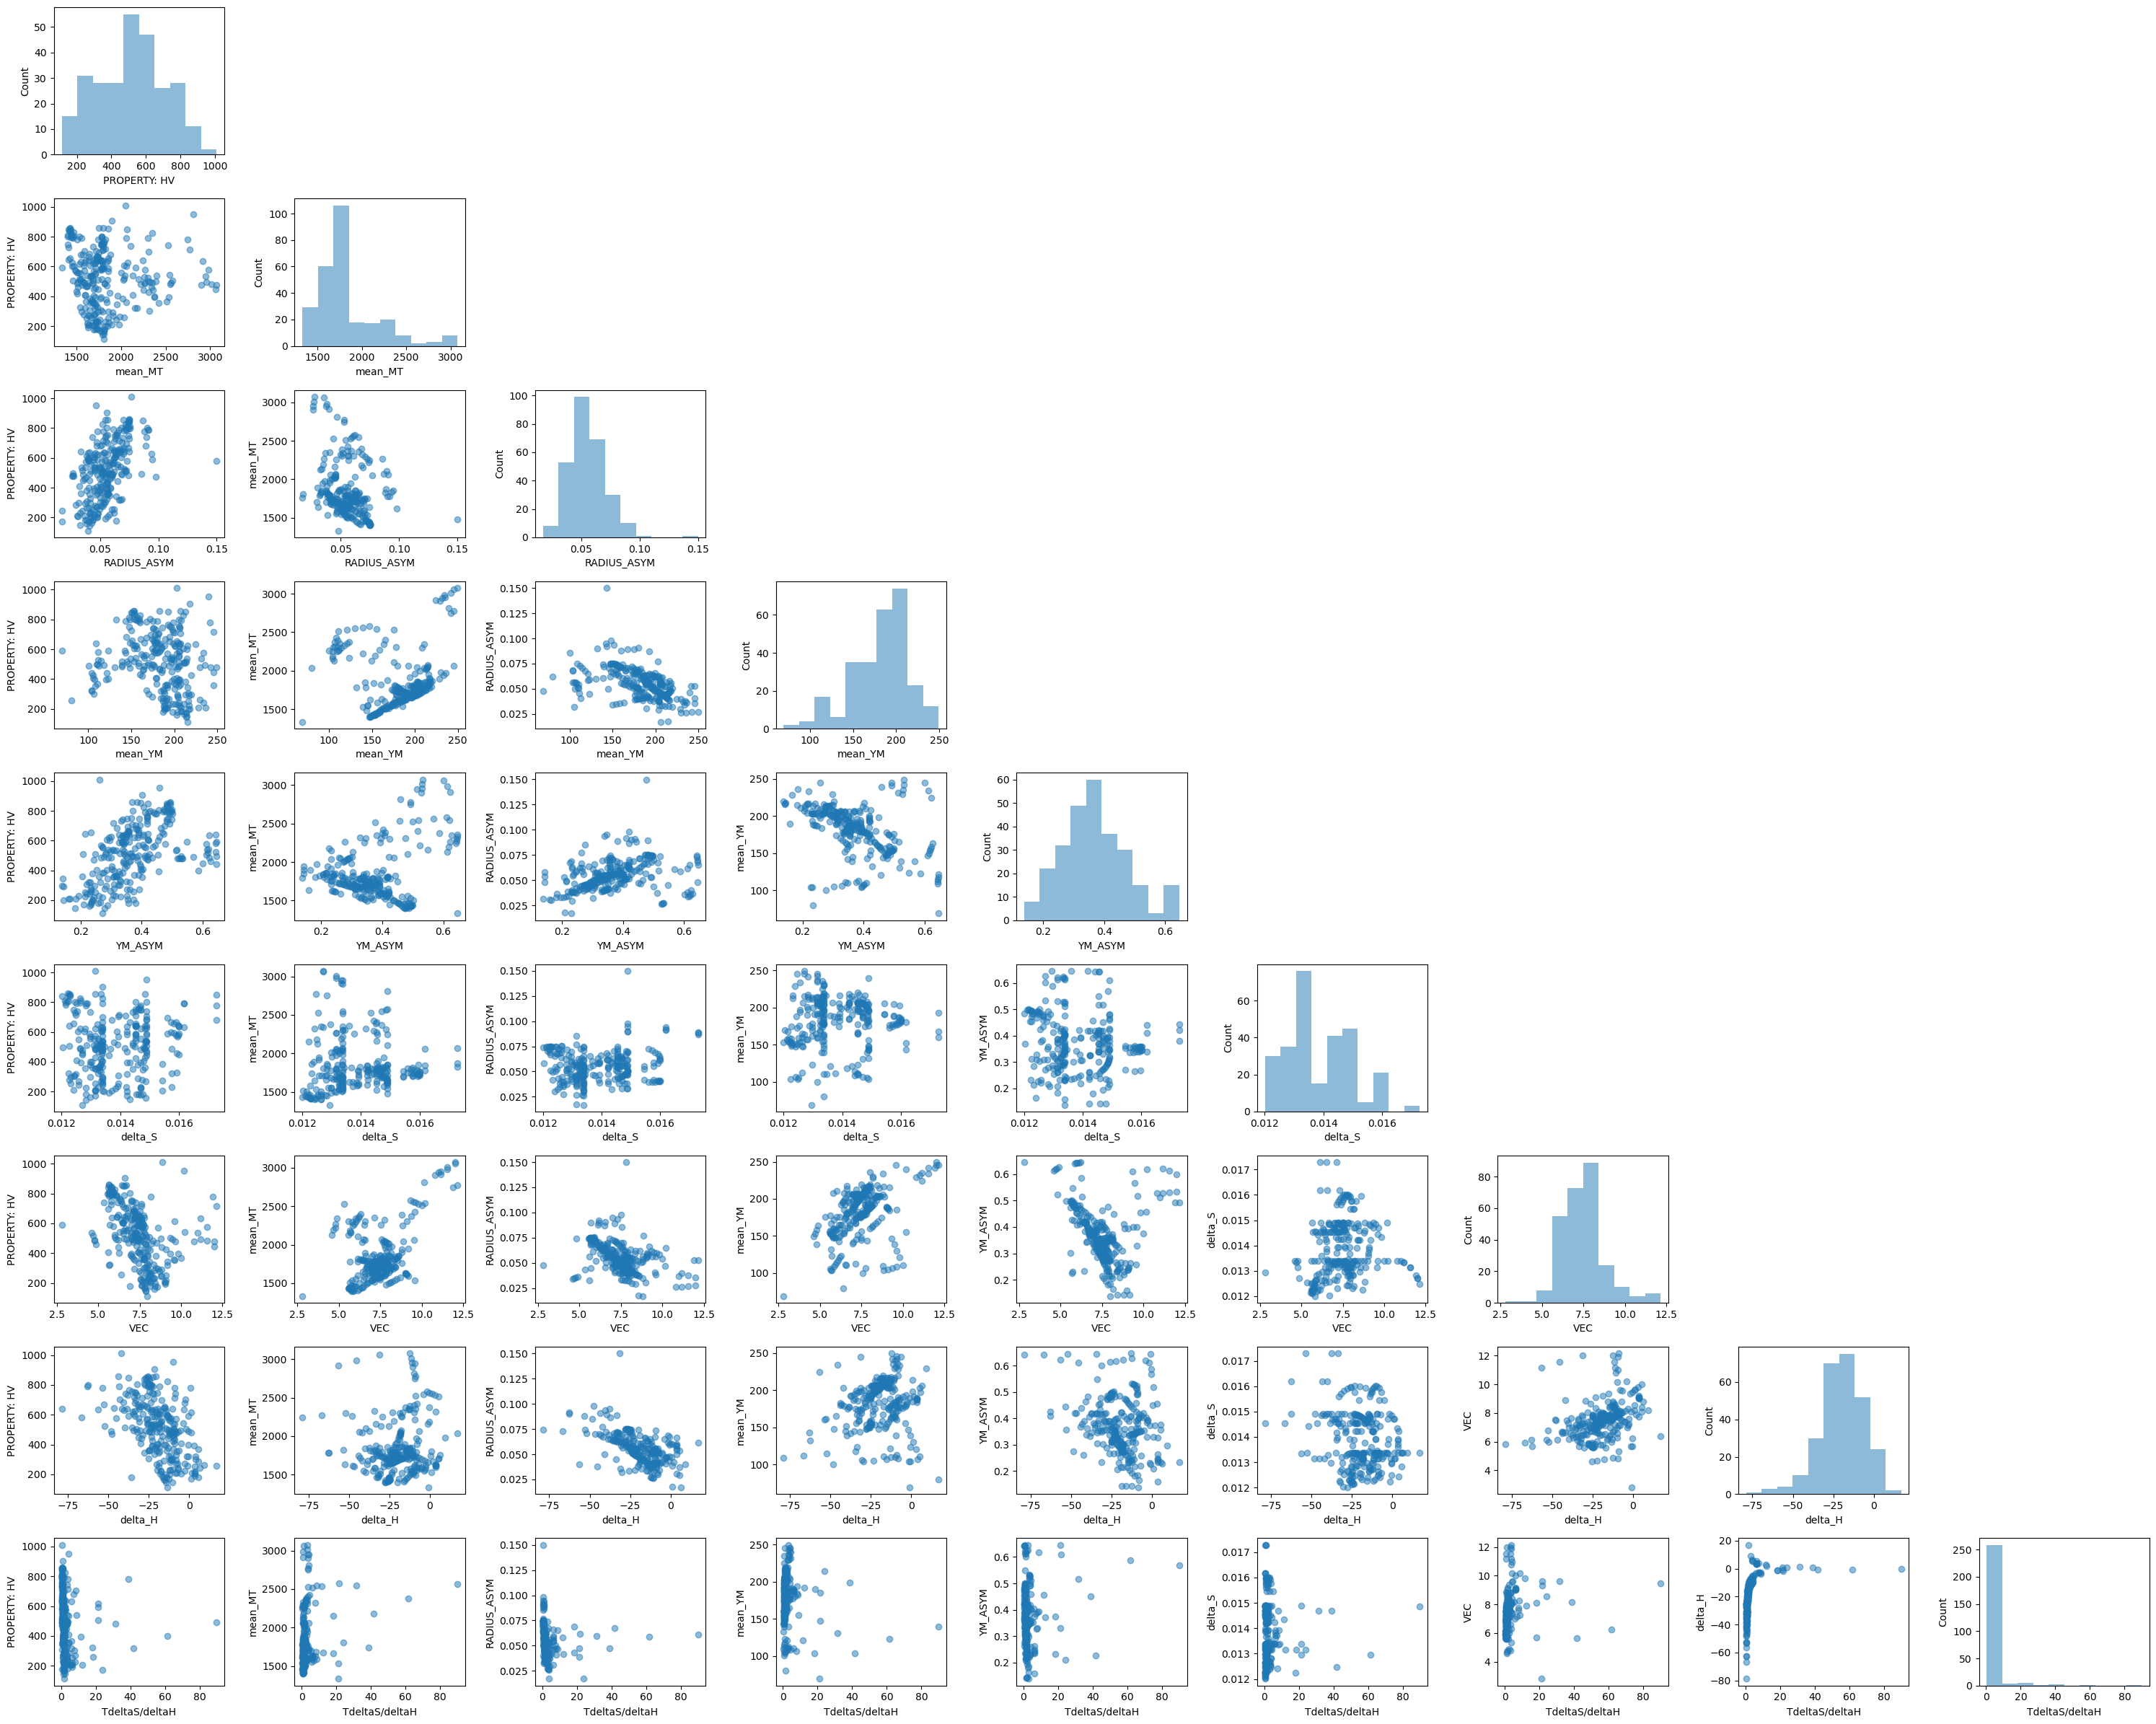

In [42]:
scatterplotmatrix(df_analysis2[cols1].values, figsize=(30, 24), 
                  names=cols1, alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()

・左下のTdeltaS/deltaHの散布図は、かなり大きな値を持つ(deltaHが0に近い)ものがあるせいで、グラフのスケールが伸ばされているせいで0近辺に値の集中した棒グラフにな　　　っている。
・正規分布から明らかに外れている散布図をもつ説明変数もある。delta_S(混合エントロピー)とmean_MT(融点の平均)がそれに当てはまる。

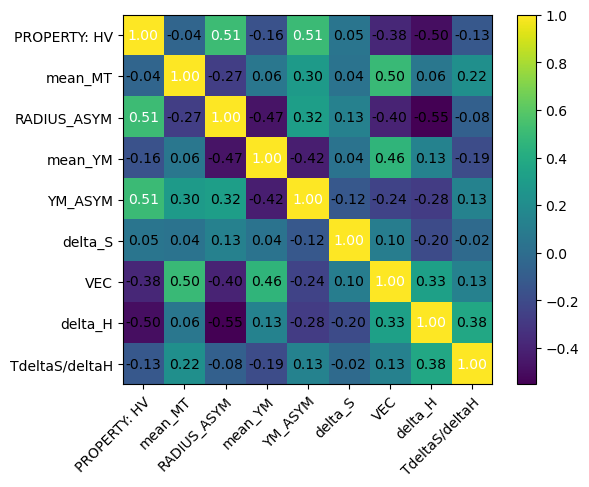

In [43]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df_analysis2[cols1].values.T)
hm = heatmap(cm, row_names=cols1, column_names=cols1)

# plt.savefig('images/10_04.png', dpi=300)
plt.show()

相関係数をプロットした。
・説明変数間で相関係数の絶対値が0.5以上のものはなく、線形回帰を実行しても多重共線性の恐れはない。

## 線形回帰(LASSO)

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.metrics import make_scorer

import warnings
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import os
have_progressbar = True
try:
    import progressbar 
except ModuleNotFoundError:
    have_progressbar = False



トレーニングデータを5分割する。

In [45]:
# パラメタ設定
RANDOM_STATE = 0 # random value for CV.
NFOLD = 5 # nfold for CV.

In [ ]:
DESCRIPTOR_NAMES=['mean_MT',
 'RADIUS_ASYM','mean_YM', 'YM_ASYM', 'delta_S', 'VEC', 'delta_H','TdeltaS/deltaH']

TARGET_NAME ='PROPERTY: HV'

Xraw=df_analysis2[DESCRIPTOR_NAMES].values 
y=df_analysis2[TARGET_NAME]

In [53]:
#正規化など
col_gen=["mean","std","coef"]
df_gen=pd.DataFrame(index=col_gen, columns=DESCRIPTOR_NAMES)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xraw)
print(scaler.mean_)
df_gen.loc['mean', :]=scaler.mean_
df_gen.loc['std', :]=np.sqrt(scaler.var_)
display(df_gen)
X = scaler.transform(Xraw) # 規格化された説明変数



StandardScaler()

[ 1.83693574e+03  5.52898955e-02  1.81635197e+02  3.70857276e-01
  1.38640486e-02  7.45594839e+00 -1.96148093e+01  3.27206067e+00]


,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
mean,1836.935739,0.05529,181.635197,0.370857,0.013864,7.455948,-19.614809,3.272061
std,345.532893,0.015387,33.1096,0.107656,0.001109,1.3429,13.809095,8.067333
coef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## LASSOCV

これからLASSOを使い、回帰係数や正則化パラメーターを求める。

In [49]:
def calc_lasso_score(X, y, descriptor_names, nfold=5, random_state=2):
    """calculate Lasso CV score.
    
    Args:
        X (np.ndarray): (N,P), descriptor variables.
        y (np.ndarray): (N), target variable.
        descriptor_names (List[str]): (P), descriptor names
        nfold (int, optional): number of folding in CV. Defaults to 5.
        random_state (int, optional): random_state for KFold instance. Defaults to 0.

    """
    kf = KFold(n_splits=nfold, shuffle=True, random_state=random_state)
    meanlist = []
    varlist = []

    reg = LassoCV(fit_intercept=True, alphas=np.arange(1, 100, 1))
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")    
        reg.fit(X,y)
    print("alpha=", reg.alpha_)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")    
        scorelist = cross_val_score(
            reg, X, y, scoring=make_scorer(r2_score), cv=kf)
    mean = np.mean(scorelist) # 平均
    std = np.std(scorelist) # 標準偏差
    result = {"score_mean": mean, "score_std": std}
    print(result)
    df_coef = pd.DataFrame({"descriptor": descriptor_names, "coef": reg.coef_}).set_index("descriptor", drop=True)
    display(df_coef)
    return result
    
lasso_score = calc_lasso_score(X, y, DESCRIPTOR_NAMES, nfold=NFOLD, random_state=RANDOM_STATE)
# モデル全探索を行う前に、LassoのCV scoreと係数を計算する。 
print(lasso_score)

alpha= 14
{'score_mean': 0.43757709031619585, 'score_std': 0.04320820036745873}


,coef
descriptor,
mean_MT,-0.000000
RADIUS_ASYM,45.519295
mean_YM,17.827753
YM_ASYM,62.914740
delta_S,0.000000
VEC,-23.734186
delta_H,-35.354992
TdeltaS/deltaH,-0.000000


{'score_mean': 0.43757709031619585, 'score_std': 0.04320820036745873}


R2の値は0.44以下となり、線形回帰の当てはまりは良くない。


## 遺伝的アルゴリズムで使用するデータシートの生成

In [77]:
def lasso_gen(X, y, descriptor_names, nfold=5, random_state=0):
    """calculate Lasso CV score.
    
    Args:
        X (np.ndarray): (N,P), descriptor variables.
        y (np.ndarray): (N), target variable.
        descriptor_names (List[str]): (P), descriptor names
        nfold (int, optional): number of folding in CV. Defaults to 5.
        random_state (int, optional): random_state for KFold instance. Defaults to 0.

    """
    kf = KFold(n_splits=nfold, shuffle=True, random_state=random_state)
    meanlist = []
    varlist = []

    reg = LassoCV(fit_intercept=True, alphas=np.logspace(-5,2,20))
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")    
        reg.fit(X,y)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")    
        scorelist = cross_val_score(
            reg, X, y, scoring=make_scorer(r2_score), cv=kf)
    mean = np.mean(scorelist) # 平均
    std = np.std(scorelist) # 標準偏差
    result = {"score_mean": mean, "score_std": std}
    
    df_coef = pd.DataFrame({"descriptor": descriptor_names, "coef": reg.coef_}).set_index("descriptor", drop=True)
    
    #切片の保存 GAで読み込むために使う。
    intercept=reg.intercept_
    print(intercept)
    f = open('lasso_intercept.txt', 'w')
    f.write(str(intercept))
    f.close()
    
    return reg.coef_

In [78]:
df_gen.loc['coef', :]=lasso_gen(X, y, DESCRIPTOR_NAMES, nfold=NFOLD, random_state=RANDOM_STATE)
display(df_gen)
df_gen.to_csv("df_gen.csv")

515.0817899607567


,mean_MT,RADIUS_ASYM,mean_YM,YM_ASYM,delta_S,VEC,delta_H,TdeltaS/deltaH
mean,1836.935739,0.05529,181.635197,0.370857,0.013864,7.455948,-19.614809,3.272061
std,345.532893,0.015387,33.1096,0.107656,0.001109,1.3429,13.809095,8.067333
coef,-0.0,38.822635,4.706428,56.367571,0.0,-17.045764,-37.024298,-0.0
